<h2>Explainable AI Project for Extreme Gradient Boosting with SHAP analysis and LIME/GIME modeling</h2>

In [222]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

In [223]:
df = pd.read_csv('./data/archive.zip', compression='zip')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [225]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [226]:
df.corr(method='pearson')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Correlation matrix reveals the highly features among explainable varaibles. Even though Extreme Boosting applies regularization by default, we should remove those with too high values for further computation purposes</h3>

In [227]:
import numpy as np

def drop_highly_correlated(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop)

df = drop_highly_correlated(df)

df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,1,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,1,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,1,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,1,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,1,0.035490


In [228]:
#list of names for later
col_names = list(df)
col_names.remove('Bankrupt?')
print(col_names)
print(len(col_names))

[' ROA(C) before interest and depreciation before interest', ' Operating Gross Margin', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Borrowing dependency', ' Contingent liabilities/Net worth', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts

<h3>We encounter here a significant issue in class imbalance of nearly 30%</h3>

In [229]:
print(df['Bankrupt?'].value_counts())
ratio = df['Bankrupt?'].value_counts()[0] / df['Bankrupt?'].value_counts()[1]
print('Ratio of classes is: ', ratio)

0    6599
1     220
Name: Bankrupt?, dtype: int64
Ratio of classes is:  29.995454545454546


<h2>Class Balancing</h2>

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'Bankrupt?'], df['Bankrupt?'], test_size=0.3, random_state=42, stratify=df['Bankrupt?'])

In [231]:
X_train

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
3295,0.531760,0.611576,0.999121,0.303400,1.358729e-04,0.000000e+00,0.465310,0.000646,0.064480,0.164342,...,0.594670,0.314550,0.049710,0,0.000557,0.624058,0.027301,0.566798,1,0.034138
2232,0.468630,0.601010,0.999012,0.303474,7.530000e+09,0.000000e+00,0.465717,0.000558,0.000000,0.187856,...,0.640576,0.315841,0.037932,0,0.030763,0.619200,0.028223,0.568058,1,0.018026
5538,0.507093,0.611972,0.999132,0.303451,1.320569e-04,4.640000e+09,0.472676,0.000178,0.192631,0.208714,...,0.597713,0.315293,0.016081,0,0.002987,0.625407,0.026885,0.565571,1,0.042552
6282,0.483937,0.601183,0.999032,0.303413,5.860000e+08,6.790000e+08,0.471008,0.000427,0.924486,0.191016,...,0.638304,0.314158,0.043999,0,0.001312,0.622709,0.027413,0.567025,1,0.045048
2143,0.481695,0.631942,0.999006,0.303662,5.637279e-04,1.685969e-04,0.448195,0.000000,0.000000,0.170663,...,0.534165,0.314598,0.004492,0,0.000280,0.624105,0.026791,0.565159,1,0.154753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,0.550090,0.602221,0.999046,0.303527,6.150000e+09,3.800000e+09,0.470314,0.000249,0.029760,0.237832,...,0.631414,0.317088,0.044215,0,0.318807,0.623799,0.026865,0.565486,1,0.024197
1078,0.481597,0.605933,0.999021,0.303343,1.455863e-04,3.310000e+09,0.461711,0.000298,0.000000,0.176942,...,0.566396,0.311848,0.031261,0,0.001990,0.623473,0.025451,0.588994,1,0.023023
6687,0.622288,0.614293,0.998882,0.306831,2.438774e-04,1.387146e-04,0.454466,0.000519,0.000000,0.290885,...,0.558054,0.314819,0.006380,0,0.002238,0.624557,0.026794,0.565172,1,0.143685
2623,0.586847,0.609774,0.999064,0.303589,1.644351e-04,2.170000e+09,0.472127,0.000000,0.206094,0.188193,...,0.633046,0.313406,0.020439,0,0.000987,0.623850,0.026791,0.565159,1,0.051988


<h2>SMOTE Oversampling</h2>
<h3>With imblearn library we can use over- and undersampling data augmentation methods to solve the problem. In this case we use Synthetic Minority Oversampling Technique approach oversample data by applying KNN method to find most likely data sample and drawing a new one at that point.</h3>

In [232]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [233]:
print(X_train.value_counts())
print(y_train.value_counts())

 ROA(C) before interest and depreciation before interest   Operating Gross Margin   Operating Profit Rate   Non-industry income and expenditure/revenue   Operating Expense Rate   Research and development expense rate   Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)   Net Value Per Share (B)   Persistent EPS in the Last Four Seasons   Cash Flow Per Share   Revenue Per Share (Yuan ¥)   Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate   After-tax Net Profit Growth Rate   Continuous Net Profit Growth Rate   Total Asset Growth Rate   Net Value Growth Rate   Total Asset Return Growth Rate Ratio   Cash Reinvestment %   Current Ratio   Quick Ratio   Interest Expense Ratio   Total debt/Total net worth   Debt ratio %   Long-term fund suitability ratio (A)   Borrowing dependency   Contingent liabilities/Net worth   Inventory and accounts receivable/Net value   Total Asset Turnover   Accounts Receivable Turnover   Average Collection Days   Inventory Turno

In [234]:
print(X_train_smote.value_counts())
print(y_train_smote.value_counts())

 ROA(C) before interest and depreciation before interest   Operating Gross Margin   Operating Profit Rate   Non-industry income and expenditure/revenue   Operating Expense Rate   Research and development expense rate   Cash flow rate   Interest-bearing debt interest rate   Tax rate (A)   Net Value Per Share (B)   Persistent EPS in the Last Four Seasons   Cash Flow Per Share   Revenue Per Share (Yuan ¥)   Realized Sales Gross Profit Growth Rate   Operating Profit Growth Rate   After-tax Net Profit Growth Rate   Continuous Net Profit Growth Rate   Total Asset Growth Rate   Net Value Growth Rate   Total Asset Return Growth Rate Ratio   Cash Reinvestment %   Current Ratio   Quick Ratio   Interest Expense Ratio   Total debt/Total net worth   Debt ratio %   Long-term fund suitability ratio (A)   Borrowing dependency   Contingent liabilities/Net worth   Inventory and accounts receivable/Net value   Total Asset Turnover   Accounts Receivable Turnover   Average Collection Days   Inventory Turno

<h2>Fitting transforms</h2>
<h3>Before training model we need to convert data to encoded format. The XGBoost is a robust model and can be used with outliers and overfitting.</h3>

In [235]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#We use label econder to encode target variable and standard scaler for explaining data
label_encoder = LabelEncoder()
scaler = StandardScaler()

y_train = label_encoder.fit_transform(y_train)
y_train_smote = label_encoder.fit_transform(y_train_smote)
y_test = label_encoder.fit_transform(y_test)

X_train = scaler.fit_transform(X_train)
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.fit_transform(X_test)

In [236]:
X_test

array([[ 0.30644177, -0.56372022,  0.02946968, ..., -0.02219262,
         0.        ,  0.25467039],
       [ 1.82913202,  0.32920011,  0.04040895, ..., -0.01929424,
         0.        ,  0.12741279],
       [ 0.73814065, -0.29822236,  0.03660225, ...,  0.00902419,
         0.        , -0.4479253 ],
       ...,
       [-0.15441501, -3.15989147, -0.22352264, ...,  0.04434834,
         0.        ,  0.16694822],
       [-0.70922502, -0.73538577,  0.02392659, ..., -0.17726176,
         0.        ,  0.10427625],
       [ 0.26918445, -0.43226851,  0.03319625, ...,  0.02767624,
         0.        , -0.62435852]])

<h2>Model Training</h2>
<h3>In order to swiftly find best configuration of hyperparameters we will use skopt library and apply Bayesian Search Cross Validation looking for most suitable combination of values by applying Bayes Theorem approach.</h3>

In [237]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from category_encoders import TargetEncoder

estimators = [
    ('clf', XGBClassifier(random_state=42)) #random state has to match th results from previous cells to maintain scores and data integrity
]

pipeline = Pipeline(steps=estimators)

pipeline

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

<h3>We search for 9 distinct parameters to optimize the Gradient Booster. Could be more but the computation gets more complex with each addition. Moreover we search in space of raw and oversampled data for comparison.</h3>

In [238]:
#search space for different parameters
search_space = {
    'clf__max_depth': Integer(2,20),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
    #add more if necessary
}

opt = BayesSearchCV(pipeline, search_space, cv=8, n_iter=50, scoring='roc_auc', random_state=42)
opt_smote = BayesSearchCV(pipeline, search_space, cv=8, n_iter=50, scoring='roc_auc', random_state=42)

In [239]:
#testing/training
import numpy as np
x = XGBClassifier().fit(X_train, y_train)
np.unique(x.predict(X_train_smote))

array([0, 1])

In [240]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=8,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       int...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [241]:
opt_smote.fit(X_train_smote, y_train_smote)

BayesSearchCV(cv=8,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       int...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

<h2>Optimizer evaluation</h2>
<h3>As the model is trained, we start to develop XAI methods to explain how the final result was achieved. Since SMOTE allows to upsample data from data with smaller observations, we can equalize 0s and 1s to avoid bias that favours result with higher frequency of observations. SMOTE model gives back worse results so we only use standard one.</h3>

In [242]:
y_pred = opt.best_estimator_.named_steps['clf'].predict(X_test)

In [243]:
y_proba = opt.best_estimator_.named_steps['clf'].predict_proba(X_test)[:,1] #the function calculates values from 2 distinct "angles"

In [244]:
print(y_pred[0])
print(y_proba[0])

0
0.007975845


In [245]:
y_pred_smote = opt_smote.best_estimator_.named_steps['clf'].predict(X_test)

In [246]:
from sklearn.metrics import roc_curve, roc_auc_score
print(roc_curve(y_test, y_pred))

(array([0.00000000e+00, 5.05050505e-04, 1.00000000e+00]), array([0.        , 0.04545455, 1.        ]), array([inf,  1.,  0.]))


opt.best_estimator_

In [247]:
opt_smote.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.5,
                               colsample_bynode=0.8771167743031129,
                               colsample_bytree=0.5, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.3472887461335411, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=13,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None, ...))])

<h3>Comparable scoring of models</h3>

In [248]:
opt.best_score_

0.9369149280672611

In [249]:
opt_smote.best_score_

0.9989790710855451

<h2>Scoring</h2>
<h3>Determinant of coefficient comparison</h3>

In [250]:
import seaborn as sb
opt.score(X_train, y_train)

0.9544456409578729

In [251]:
opt_smote.score(X_train, y_train)

0.890252851716372

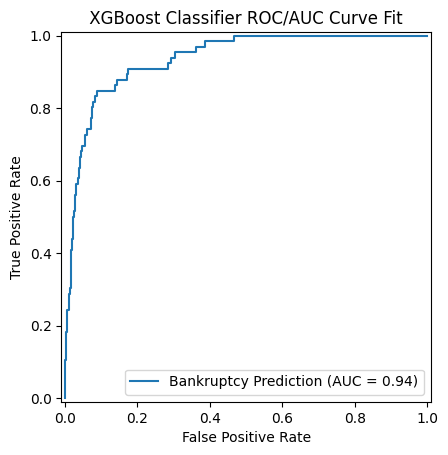

In [252]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Bankruptcy Prediction')

display.plot()
plt.title(" XGBoost Classifier ROC/AUC Curve Fit ")
plt.show()

<h3>Accuracy comparison</h3>

In [253]:
type(y_pred_smote)
y_pred_smote

array([1, 0, 0, ..., 0, 1, 1])

In [254]:
from sklearn.metrics import accuracy_score
import random

accuracy = accuracy_score(y_test, y_pred)
accuracy_smote = accuracy_score(np.random.choice(y_test_smote, 2046), y_pred_smote)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy of SMOTE: %.2f%%" % (accuracy_smote * 100.0))

Accuracy: 96.87%
Accuracy of SMOTE: 49.07%


In [255]:
opt.best_estimator_.steps[0]

('clf',
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.5, colsample_bynode=1.0, colsample_bytree=0.5,
               device=None, early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, feature_weights=None,
               gamma=0.0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.02561117833398022,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=2, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...))

<h2>Feature importance analysis</h2>
<h3>For final thoughts we use built-in XGBoost solutions including plot importance table to better explain the impact each of features has on the final output.
This allows us to further evaluate the model</h3>

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

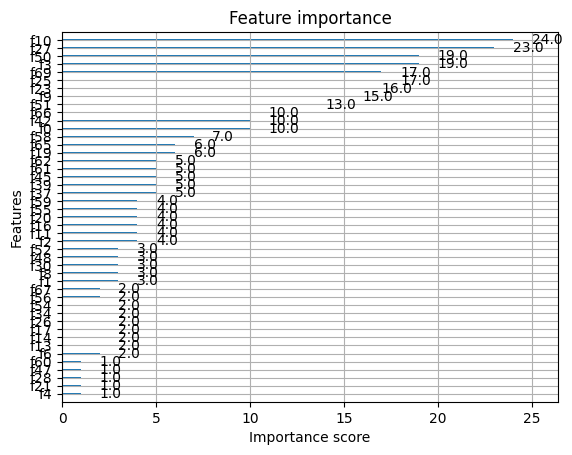

In [256]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.named_steps['clf']
xgboost_model = xgboost_step

plot_importance(xgboost_model)

In [257]:
print(type(opt.best_estimator_.named_steps['clf']))
opt.best_estimator_.named_steps['clf']

<class 'xgboost.sklearn.XGBClassifier'>


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=1.0, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02561117833398022,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [258]:
print(opt.best_estimator_.named_steps['clf'].feature_importances_)

[0.02789778 0.01345874 0.00632621 0.04220174 0.02272392 0.
 0.01670722 0.         0.0358677  0.03375484 0.05895311 0.02072048
 0.         0.00545069 0.00527228 0.         0.00908172 0.01371882
 0.         0.01658998 0.00503388 0.01472046 0.         0.01377134
 0.         0.03808336 0.01753302 0.0829307  0.03764928 0.
 0.01439689 0.         0.         0.         0.01594182 0.
 0.         0.0096904  0.         0.01801098 0.         0.
 0.01967797 0.         0.         0.01112147 0.         0.00795399
 0.06728467 0.         0.04885446 0.0280605  0.01004413 0.
 0.00825933 0.01115024 0.00559292 0.         0.01201291 0.01447865
 0.01857262 0.01658989 0.02754392 0.         0.         0.02036928
 0.03112626 0.00900083 0.         0.0358185 ]


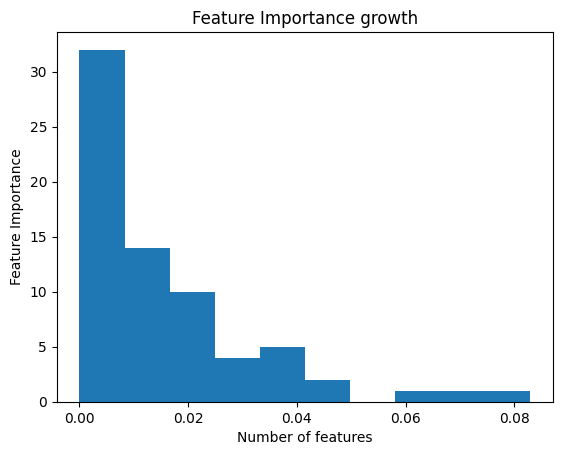

In [259]:
bringer = opt.best_estimator_.named_steps['clf'].feature_importances_
bringer = sorted(bringer)
plt.hist(bringer)
plt.title("Feature Importance growth")
plt.xlabel("Number of features")
plt.ylabel("Feature Importance")
plt.show()

In [260]:
bringer2 = list(filter(lambda a: a != 0, bringer))

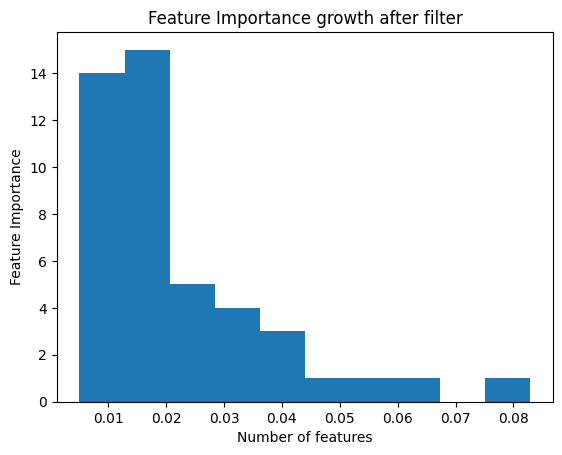

In [261]:
plt.hist(bringer2)
plt.title("Feature Importance growth after filter")
plt.xlabel("Number of features")
plt.ylabel("Feature Importance")
plt.show()

<h3>Shapes before and after splitting match so we can proceed to sampling from flattened data<h3>

In [262]:
print(df.shape)

(6819, 71)


In [263]:
print(X_train.shape)
print(X_train.flatten())

(4773, 70)
[ 0.45176654  0.22538519  0.02514478 ... -0.05241326  0.
 -0.64505702]


In [264]:
np.random.seed(42)
shap.initjs()
#wrong!
#sampled_data = np.random.choice(X_train.flatten(), 100)
#sampled_data_smote = np.random.choice(X_train_smote.flatten(), 100)

<h2>Encode back the header to understand the data properly.</h2>

In [265]:
col_names

[' ROA(C) before interest and depreciation before interest',
 ' Operating Gross Margin',
 ' Operating Profit Rate',
 ' Non-industry income and expenditure/revenue',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Long-term fund suitability ratio (A)',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Inventory and accounts receivable/Net value',
 ' Tot

In [266]:
X_train = scaler.inverse_transform(X_train)

X_train = pd.DataFrame(X_train)

sampled_data = X_train.sample(100, random_state=42)
sampled_data.set_axis(col_names, axis=1,inplace=True)
X_train.set_axis(col_names, axis=1,inplace=True)

sampled_data.head(2)

C:\Users\X\AppData\Local\Temp\ipykernel_22708\939602348.py:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  sampled_data.set_axis(col_names, axis=1,inplace=True)
C:\Users\X\AppData\Local\Temp\ipykernel_22708\939602348.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  X_train.set_axis(col_names, axis=1,inplace=True)


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
33,0.416696,0.599275,0.998845,0.302490,6.978506e+07,4.810244e+06,0.494758,550437.95971,0.005352,0.133529,...,0.927605,0.314184,0.070855,0.000676,-2.133982e+06,0.623694,0.026915,0.564608,1.0,0.024390
555,0.485968,0.606387,0.998904,0.303104,6.978506e+07,2.131248e+09,0.459714,550437.95920,0.383651,0.184201,...,0.556345,0.312783,0.026792,0.000676,-2.133982e+06,0.624360,0.027100,0.566861,1.0,0.022935


In [267]:
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(sampled_data)

In [268]:
#explainer_smote = shap.TreeExplainer(xgboost_model_smote)
#shap_values_smote = explainer.shap_values(sampled_data_smote)

<h2>SHAP explainers</h2>
<h3>This technique allows us to check the impact each of feature by ??. The obstacle is the number of features, which can be addressed by ??</h3>

In [269]:
shap.force_plot(explainer.expected_value, shap_values[0,:], sampled_data.iloc[0,:])

In [270]:
#shap.force_plot(explainer_smote.expected_value, shap_values_smote[0,:], sampled_data_smote.iloc[0,:])

In [271]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [272]:
#shap.force_plot(explainer_smote.expected_value, shap_values_smote, X_train_smote)

<h3>Feature values for explaining the Booster model</h3>

C:\Users\X\AppData\Local\Temp\ipykernel_22708\2516788097.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sampled_data)


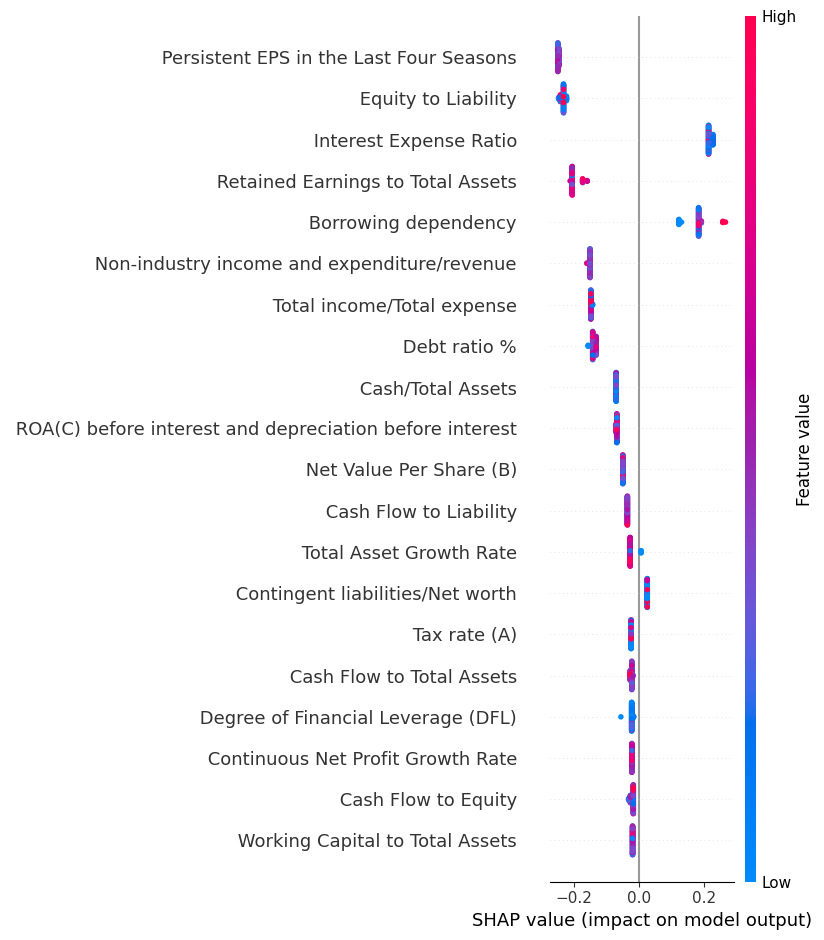

In [273]:
shap.summary_plot(shap_values, sampled_data)

In [274]:
#shap.summary_plot(shap_values_smote, sampled_data_smote)

C:\Users\X\AppData\Local\Temp\ipykernel_22708\2157091365.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, sampled_data, plot_type="bar")


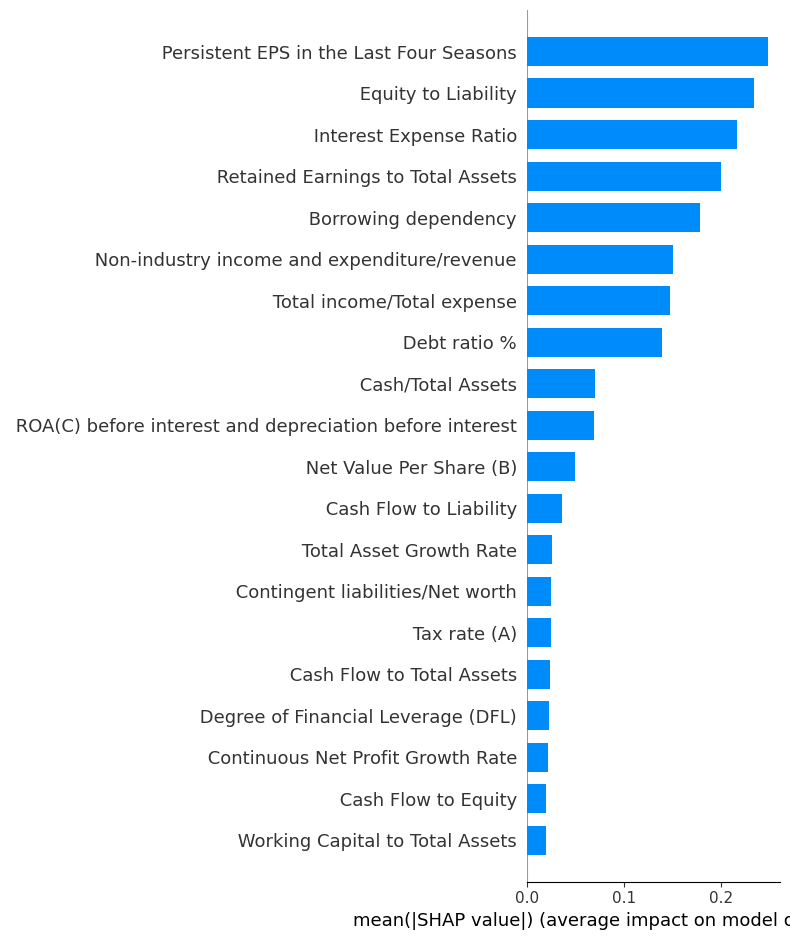

In [275]:
shap.summary_plot(shap_values, sampled_data, plot_type="bar")

In [276]:
#shap.summary_plot(shap_values_smote, sampled_data_smote, plot_type="bar")

<h2>LIME</h2>

<h3>We are trying to implement individual effects using LIME approach. Due to large number of rows we will determine 3 of them to showcase the potential. As the data we pick has censored names, it's impossible to determine what companies are facing bankruptcy. However in practice it would be very useful to analyze single case scenario.

Personally I call it row explainability xD</h3>

In [285]:
fn = list(X_train.columns.values)
X_train_fits = scaler.fit_transform(X_train)

In [292]:
import lime
import lime.lime_tabular as tab

# Select a random data point from the test set
instance_idx = [31,8, 3]
instance = X_test[instance_idx[0]]
instance2 = X_test[instance_idx[1]]
instance3 = X_test[instance_idx[2]]

lime_explainer = tab.LimeTabularExplainer(
    X_train_fits, 
    feature_names=fn, 
    verbose=True, 
    discretize_continuous=True)

Intercept 0.01989498235624179
Prediction_local [0.01556884]
Right: 0.011651979


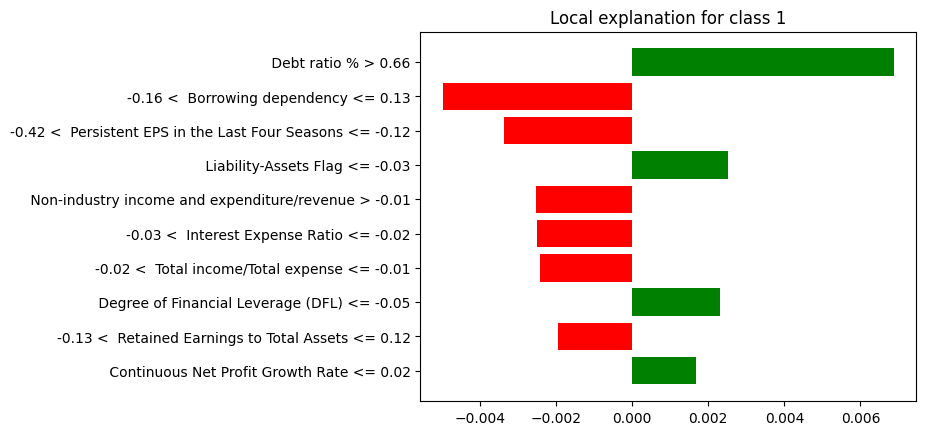

In [ ]:
explanation = lime_explainer.explain_instance(instance, xgboost_model.predict_proba, num_features=10)

# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

Intercept 0.008673880533258332
Prediction_local [0.06514165]
Right: 0.033735506


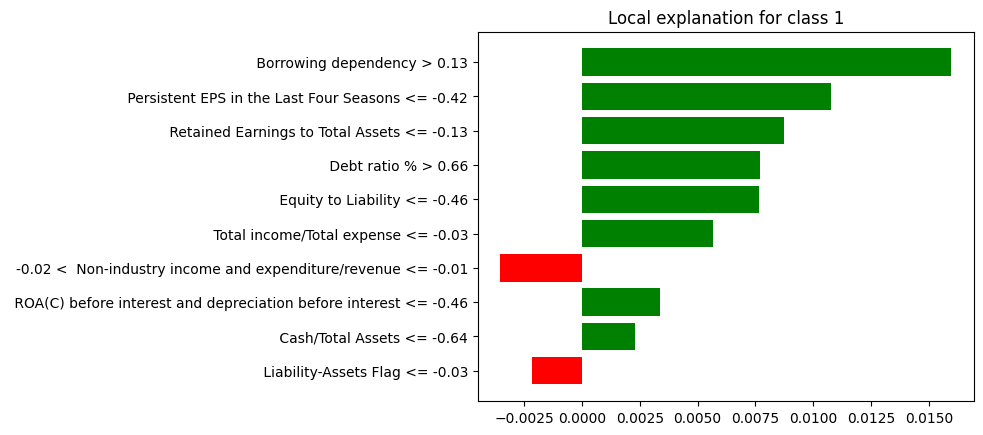

In [294]:
explanation = lime_explainer.explain_instance(instance3, xgboost_model.predict_proba, num_features=10)

# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

Intercept 0.02522439394036162
Prediction_local [0.00764217]
Right: 0.008682497


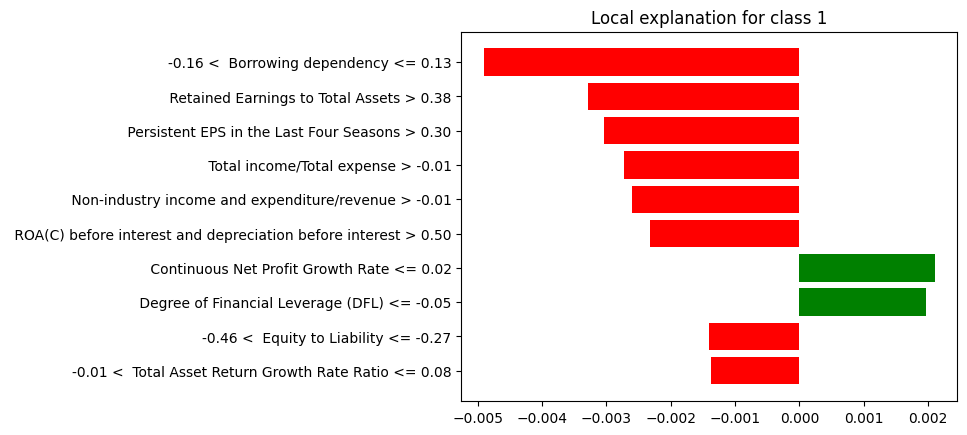

In [297]:
explanation = lime_explainer.explain_instance(instance2, xgboost_model.predict_proba, num_features=10)

# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

# Show the predictions
#explanation.show_in_notebook(show_table=True)

<h2>Ceteris Paribus Approach</h2>
<h3>For the sake of analyzing the variations of individual features, we can use Ceteris Paribus explainability to determine how does single change in one feature affects the model</h3>

In [299]:
list(X_train.columns)

[' ROA(C) before interest and depreciation before interest',
 ' Operating Gross Margin',
 ' Operating Profit Rate',
 ' Non-industry income and expenditure/revenue',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Total Asset Growth Rate',
 ' Net Value Growth Rate',
 ' Total Asset Return Growth Rate Ratio',
 ' Cash Reinvestment %',
 ' Current Ratio',
 ' Quick Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Debt ratio %',
 ' Long-term fund suitability ratio (A)',
 ' Borrowing dependency',
 ' Contingent liabilities/Net worth',
 ' Inventory and accounts receivable/Net value',
 ' Tot

In [301]:
X_train[' Tax rate (A)']

0       0.067814
1       0.005352
2       0.191952
3       0.900895
4       0.005352
          ...   
4768    0.034181
4769    0.005352
4770    0.005352
4771    0.204994
4772    0.005352
Name:  Tax rate (A), Length: 4773, dtype: float64

In [302]:
X_train[' Borrowing dependency']

0       0.375121
1       0.393747
2       0.372805
3       0.368904
4       0.365553
          ...   
4768    0.377057
4769    0.386799
4770    0.365553
4771    0.365553
4772    0.407882
Name:  Borrowing dependency, Length: 4773, dtype: float64

In [303]:
X_train[' Current Ratio']

0      -2.195021e+07
1      -1.726627e+07
2       9.259918e+06
3      -1.999011e+07
4       1.214262e+08
            ...     
4768   -2.007289e+07
4769   -1.306182e+07
4770    7.663744e+07
4771   -4.921744e+05
4772   -1.996981e+07
Name:  Current Ratio, Length: 4773, dtype: float64

In [307]:
import dalex as dx
bankruptcy_rf_exp = dx.Explainer(xgboost_model, X_train, y_train, 
                    label = "Titanic RF Pipeline")

company = pd.DataFrame({'Borrowing dependency'        : [0.368904],
                          'Current Ratio'             : [-1.306182e+07],
                          'Tax rate (A)'              : [0.900895]
                        },
                          index = ['Borrowing dependency'])

Preparation of a new explainer is initiated

  -> data              : 4773 rows 70 cols
  -> target variable   : 4773 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Titanic RF Pipeline
  -> predict function  : <function yhat_proba_default at 0x00000223AD22E020> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00757, mean = 0.00975, max = 0.0145
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0145, mean = 0.0225, max = 0.992
  -> model_info        : package xgboost

A new explainer has been created!


In [308]:
rf_profile = bankruptcy_rf_exp.predict_profile(new_observation = company)

rf_profile.plot(variables = ['construction_year', 'surface', 'floor', 'no_rooms'])

ValueError: Length mismatch: Expected axis has 3 elements, new values have 70 elements